In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/madhurendra1/machine-learning/main/heart.csv")

In [ ]:
# import all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data.shape    # shape of the dataset

(303, 14)

In [ ]:
data.columns         # columns of dataset

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.head(5)             # top 5 row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.sample(5)          # random 5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1


In [ ]:
data.describe()            # data describption

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().sum()
# conclusion: No Null value present in data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


number of male:  207

number of Female :  96


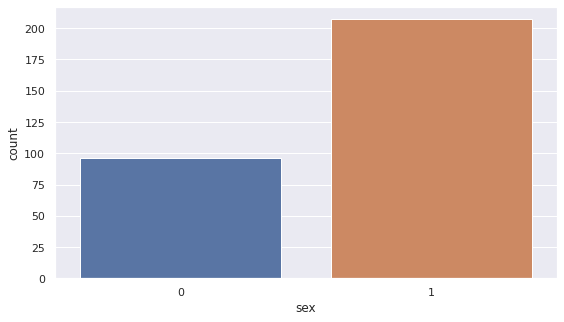

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.countplot(data['sex'])           # count plot of sex column
male = data[data['sex']==1]
female = data[data['sex']==0]

# print number of male and female in dataset
print('number of male: ', male.shape[0])
print('\nnumber of Female : ', female.shape[0])

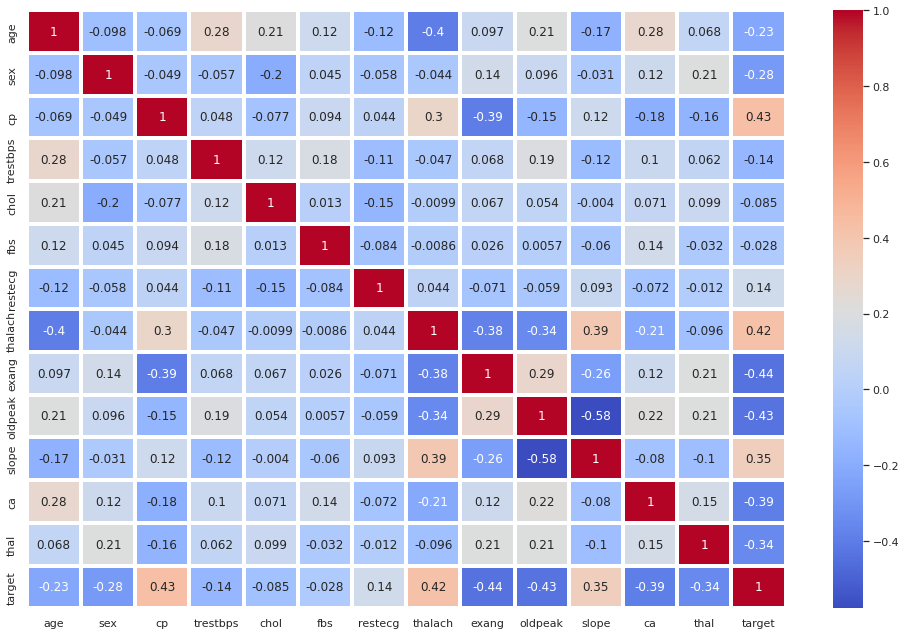

In [ ]:
sns.set(rc={'figure.figsize':(17, 11)})

# Correlation Heatmap
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, linewidths=3)

## Splitting the dataset into train and test 

In [ ]:
# dependent variable: target
dependentVariable = 'target'

# store all independent variable in X and dependent variable in y
X = data.drop([dependentVariable], axis=1)
y = data[dependentVariable]

# splitting the dataset into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## logisticRegression

In [ ]:
logisClassifier = LogisticRegression(max_iter=1000)
logisClassifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Acuracy of logistic regression for test set:  88.52459016393442
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix : 
 [[25  4]
 [ 3 29]]

Confusion Matrix heatmap : 


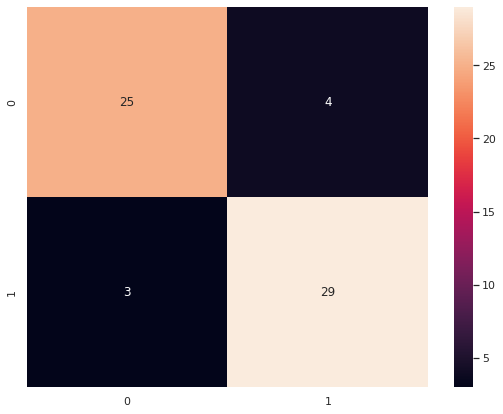

In [ ]:
sns.set(rc={'figure.figsize':(9, 7)})
print("Acuracy of logistic regression for test set: ", accuracy_score(y_test, logisClassifier.predict(X_test))*100)
print('Classification Report : \n', classification_report(y_test, logisClassifier.predict(X_test)))
print("Confusion Matrix : \n", confusion_matrix(y_test, logisClassifier.predict(X_test)))
print('\nConfusion Matrix heatmap : ')
sns.heatmap(confusion_matrix(y_test, logisClassifier.predict(X_test)), annot=True, fmt='d')

Acuracy of SVM classifier for train set:  86.36363636363636

Classification Report for train set : 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       109
           1       0.85      0.92      0.88       133

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242


Confusion Matrix for train set : 
 [[ 87  22]
 [ 11 122]]

Confusion Matrix Heatamp for train set: 


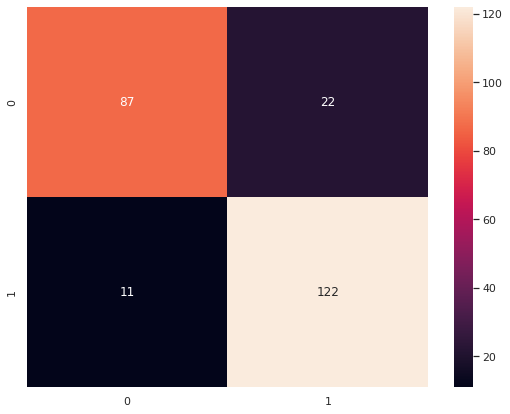

In [ ]:
print("Acuracy of SVM classifier for train set: ", accuracy_score(y_train, logisClassifier.predict(X_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, logisClassifier.predict(X_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, logisClassifier.predict(X_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, logisClassifier.predict(X_train)), annot=True, fmt='d')